In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_df=pd.read_csv('Train.csv')
test_df=pd.read_csv('Test.csv')

In [3]:
train_df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
test_df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [5]:
train_df.shape

(54808, 14)

In [6]:
test_df.shape

(23490, 13)

<AxesSubplot:>

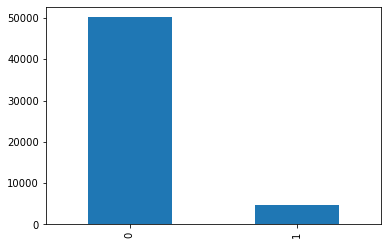

In [7]:
train_df['is_promoted'].value_counts().plot(kind='bar')

In [8]:
combine=pd.concat([train_df,test_df],sort=False)

In [9]:
combine

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61,NaN
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74,NaN
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50,NaN
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70,NaN


In [10]:
train_df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


***department***

<AxesSubplot:>

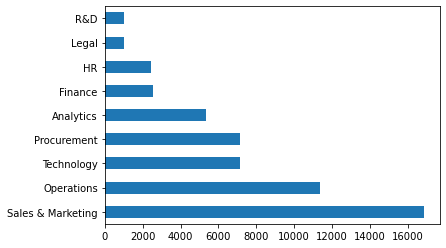

In [11]:
train_df['department'].value_counts().plot(kind='barh')

/Users/yugeshnaidu/opt/anaconda3/envs/batman/lib/python3.8/site-packages/seaborn/axisgrid.py:911: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(curr_labels, **kwargs)


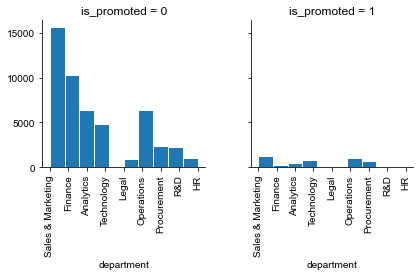

In [12]:
g=sns.FacetGrid(train_df, col="is_promoted")
sns.set(style="ticks")
g.map(plt.hist, "department")
g.set_xticklabels(rotation=90)

In [13]:
train_df['region'].unique()

array(['region_7', 'region_22', 'region_19', 'region_23', 'region_26',
       'region_2', 'region_20', 'region_34', 'region_1', 'region_4',
       'region_29', 'region_31', 'region_15', 'region_14', 'region_11',
       'region_5', 'region_28', 'region_17', 'region_13', 'region_16',
       'region_25', 'region_10', 'region_27', 'region_30', 'region_12',
       'region_21', 'region_8', 'region_32', 'region_6', 'region_33',
       'region_24', 'region_3', 'region_9', 'region_18'], dtype=object)

# Missing Values

In [14]:
train_df.info()
print("\n"*3)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB




<class 'p

Education

<AxesSubplot:>

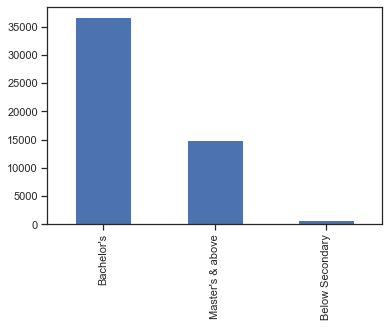

In [15]:
train_df['education'].value_counts().plot(kind='bar')

In [16]:
train_df[train_df['education'] != "Master's & above"] [train_df['education'] != "Bachelor's"] [train_df['education'] != "Below Secondary"]
train_df[train_df['education'] != "Master's & above"]

<ipython-input-16-3b2806c6e053>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_df[train_df['education'] != "Master's & above"] [train_df['education'] != "Bachelor's"] [train_df['education'] != "Below Secondary"]


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
5,58896,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.0,7,0,0,85,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54802,6915,Sales & Marketing,region_14,Bachelor's,m,other,2,31,1.0,2,0,0,49,0
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


<AxesSubplot:>

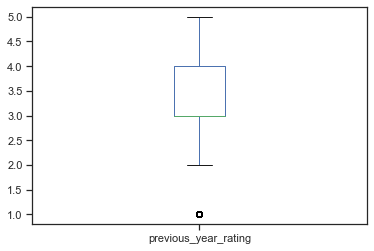

In [17]:
train_df['previous_year_rating'].plot(kind='box')

<AxesSubplot:ylabel='Density'>

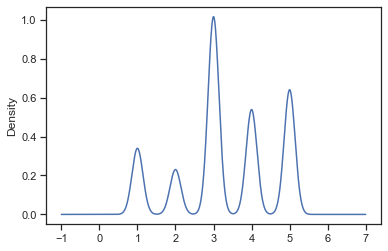

In [18]:
train_df['previous_year_rating'].plot(kind='density')

In [19]:
train_df['previous_year_rating'].describe()

count    50684.000000
mean         3.329256
std          1.259993
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: previous_year_rating, dtype: float64

In [20]:
#percentage of Missing Values in train_df
print("Missing Values in Train Data")
print("Nan % in previous_year_rating:", 100-train_df['previous_year_rating'].value_counts().sum()/len(train_df['previous_year_rating'])*100,"%")
print("Nan % in education:", 100-train_df['education'].value_counts().sum()/len(train_df['education'])*100,"%")

Missing Values in Train Data
Nan % in previous_year_rating: 7.524448985549554 %
Nan % in education: 4.395343745438623 %


In [21]:
#percentage of Missing Values intest_df
print("Missing Values in Test Data")
print("Nan % in previous_year_rating:", 100-test_df['previous_year_rating'].value_counts().sum()/len(test_df['previous_year_rating'])*100,"%")
print("Nan % in education:", 100-test_df['education'].value_counts().sum()/len(test_df['education'])*100,"%")

Missing Values in Test Data
Nan % in previous_year_rating: 7.713920817369086 %
Nan % in education: 4.401873137505319 %


In [22]:
#percentage of Missing Values in combine
print("Missing Values in Test Data")
print("Nan % in previous_year_rating:", 100-combine['previous_year_rating'].value_counts().sum()/len(combine['previous_year_rating'])*100,"%")
print("Nan % in education:", 100-combine['education'].value_counts().sum()/len(combine['education'])*100,"%")

Missing Values in Test Data
Nan % in previous_year_rating: 7.581291987023931 %
Nan % in education: 4.397302613093572 %


In [23]:
combine['previous_year_rating'].describe()

count    72362.000000
mean         3.332219
std          1.260982
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: previous_year_rating, dtype: float64

In [24]:
freq=train_df['previous_year_rating'].mode()
freq

0    3.0
dtype: float64

In [25]:
train_df['previous_year_rating'].unique()

array([ 5.,  3.,  1.,  4., nan,  2.])

In [26]:
#imputing using mode for 'previous_year_rating'
train_df['previous_year_rating']=train_df['previous_year_rating'].fillna(3.0)

In [27]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  54808 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [28]:
train_df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [29]:
train_df['education'].describe()

count          52399
unique             3
top       Bachelor's
freq           36669
Name: education, dtype: object

In [30]:
#imputing using mode for 'education'
train_df['education']=train_df['education'].fillna("Bachelor's")

In [31]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             54808 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  54808 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


# Data Visualisation

In [32]:
combine['department'].value_counts().nlargest(4)

Sales & Marketing    24155
Operations           16112
Procurement          10158
Technology           10149
Name: department, dtype: int64

<Figure size 1440x720 with 0 Axes>

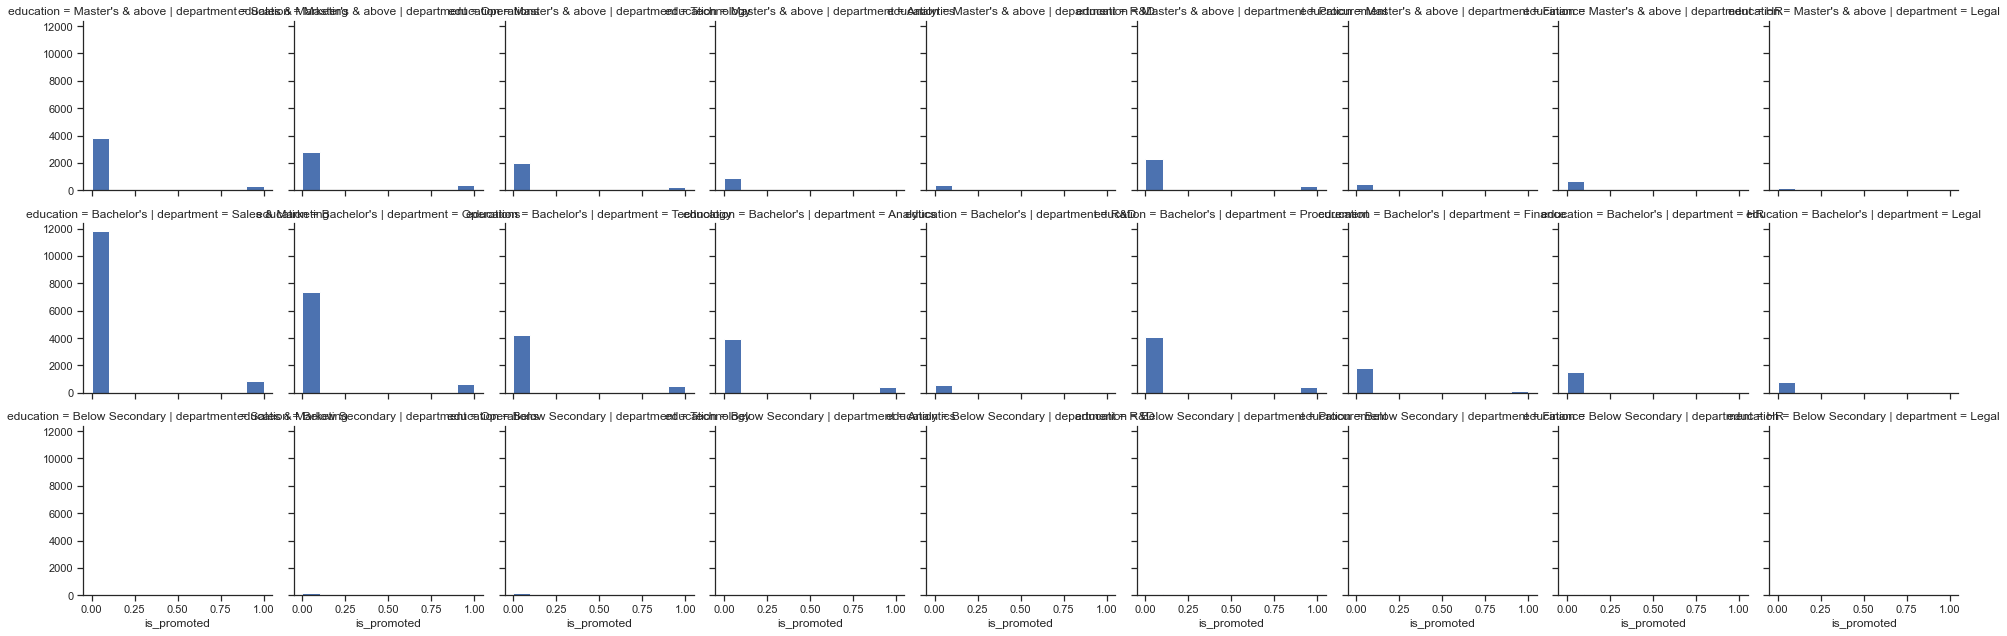

In [33]:
plt.figure(figsize=(20,10))
g = sns.FacetGrid(train_df, col="department", row="education")
g =  g.map(plt.hist,'is_promoted')

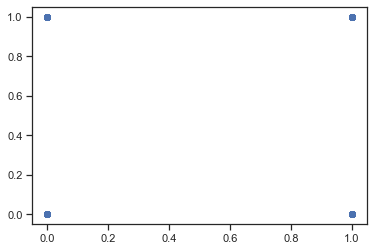

In [34]:
plt.scatter(train_df['KPIs_met >80%'],train_df['is_promoted'])

In [35]:
train_df.corr(method='pearson')

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,1.000000,-0.005121,0.000437,0.004209,0.001274,-0.002501,0.008420,-0.000586,0.001206
no_of_trainings,-0.005121,1.000000,-0.081278,-0.061564,-0.057275,-0.045576,-0.007628,0.042517,-0.024896
age,0.000437,-0.081278,1.000000,0.026810,0.657111,-0.025592,-0.008169,-0.048380,-0.017166
previous_year_rating,0.004209,-0.061564,0.026810,1.000000,0.023504,0.337367,0.026587,0.071926,0.153230
length_of_service,0.001274,-0.057275,0.657111,0.023504,1.000000,-0.077693,-0.039927,-0.038122,-0.010670
KPIs_met >80%,-0.002501,-0.045576,-0.025592,0.337367,-0.077693,1.000000,0.097000,0.078391,0.221582
awards_won?,0.008420,-0.007628,-0.008169,0.026587,-0.039927,0.097000,1.000000,0.072138,0.195871
avg_training_score,-0.000586,0.042517,-0.048380,0.071926,-0.038122,0.078391,0.072138,1.000000,0.181147
is_promoted,0.001206,-0.024896,-0.017166,0.153230,-0.010670,0.221582,0.195871,0.181147,1.000000


<AxesSubplot:>

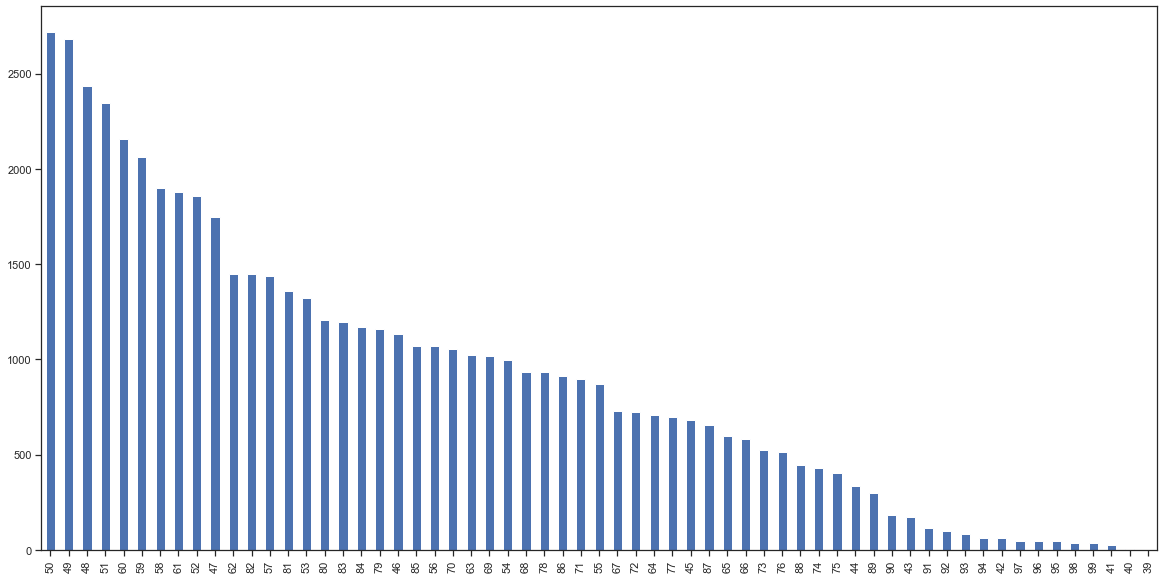

In [36]:
plt.figure(figsize=(20,10))
train_df['avg_training_score'].value_counts().plot(kind='bar')

In [37]:
train_df['avg_training_score'].describe()

count    54808.000000
mean        63.386750
std         13.371559
min         39.000000
25%         51.000000
50%         60.000000
75%         76.000000
max         99.000000
Name: avg_training_score, dtype: float64

In [38]:
train_df.corr()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,1.000000,-0.005121,0.000437,0.004209,0.001274,-0.002501,0.008420,-0.000586,0.001206
no_of_trainings,-0.005121,1.000000,-0.081278,-0.061564,-0.057275,-0.045576,-0.007628,0.042517,-0.024896
age,0.000437,-0.081278,1.000000,0.026810,0.657111,-0.025592,-0.008169,-0.048380,-0.017166
previous_year_rating,0.004209,-0.061564,0.026810,1.000000,0.023504,0.337367,0.026587,0.071926,0.153230
length_of_service,0.001274,-0.057275,0.657111,0.023504,1.000000,-0.077693,-0.039927,-0.038122,-0.010670
KPIs_met >80%,-0.002501,-0.045576,-0.025592,0.337367,-0.077693,1.000000,0.097000,0.078391,0.221582
awards_won?,0.008420,-0.007628,-0.008169,0.026587,-0.039927,0.097000,1.000000,0.072138,0.195871
avg_training_score,-0.000586,0.042517,-0.048380,0.071926,-0.038122,0.078391,0.072138,1.000000,0.181147
is_promoted,0.001206,-0.024896,-0.017166,0.153230,-0.010670,0.221582,0.195871,0.181147,1.000000


In [39]:
train_df[['KPIs_met >80%','awards_won?','avg_training_score','previous_year_rating','is_promoted']].corr()

,KPIs_met >80%,awards_won?,avg_training_score,previous_year_rating,is_promoted
KPIs_met >80%,1.000000,0.097000,0.078391,0.337367,0.221582
awards_won?,0.097000,1.000000,0.072138,0.026587,0.195871
avg_training_score,0.078391,0.072138,1.000000,0.071926,0.181147
previous_year_rating,0.337367,0.026587,0.071926,1.000000,0.153230
is_promoted,0.221582,0.195871,0.181147,0.153230,1.000000


In [40]:
train_df['department'].value_counts()

Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

<AxesSubplot:>

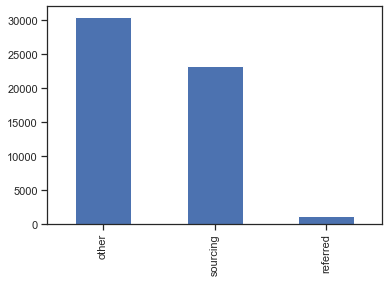

In [41]:
train_df['recruitment_channel'].value_counts().plot(kind='bar')

# Feature Selection

# Feature Engineering

In [42]:
train_df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

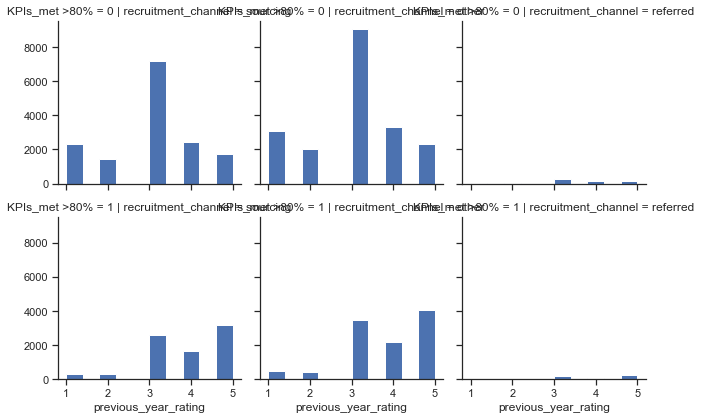

In [43]:
g = sns.FacetGrid(train_df, row='KPIs_met >80%',col='recruitment_channel')
g = g.map(plt.hist,'previous_year_rating')

Feature Importance

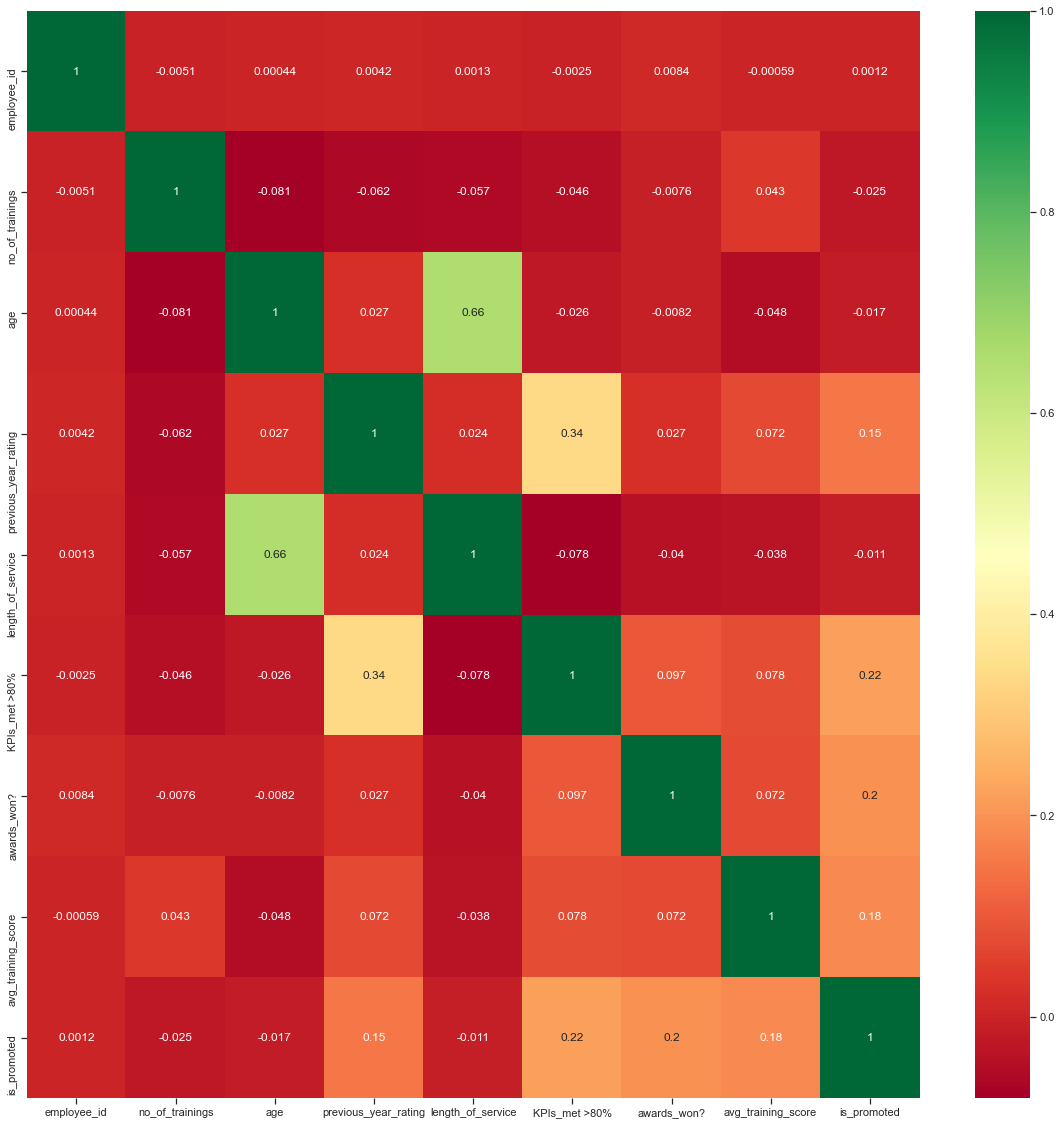

In [44]:
#get correlations of each features in dataset
corrmat = train_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(train_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# Class Imbalance Check

In [45]:
from decimal import Decimal

In [46]:
imbalance= pd.DataFrame(data=train_df,columns=train_df.columns,index=train_df.index)

In [47]:
imbalance=imbalance.drop(columns=['employee_id','no_of_trainings','length_of_service','age','avg_training_score','region'])

In [48]:
def Ratio_check(x):
    Uniq=imbalance[x].value_counts().to_dict()
    Class_1=round(1/(Uniq[0]/(Uniq[0]+Uniq[1])))
    Class_2=round(1/(Uniq[1]/(Uniq[0]+Uniq[1])))
    Ratio=(Class_1,Class_2)
    print ({x:Ratio})
    
def class_check(x):
    values=len(imbalance[x].value_counts().to_dict())
    return (values)

In [49]:
Ratio_check('is_promoted')
Ratio_check('KPIs_met >80%')
Ratio_check('awards_won?')

{'is_promoted': (1, 12)}
{'KPIs_met >80%': (2, 3)}
{'awards_won?': (1, 43)}


# Data Encoding

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
for i in train_df:
   print  (pd.DataFrame(train_df['{}'.format(i)].value_counts()))

       employee_id
2047             1
19228            1
4887             1
6934             1
789              1
...            ...
71176            1
44543            1
48637            1
36347            1
4098             1

[54808 rows x 1 columns]
                   department
Sales & Marketing       16840
Operations              11348
Technology               7138
Procurement              7138
Analytics                5352
Finance                  2536
HR                       2418
Legal                    1039
R&D                       999
           region
region_2    12343
region_22    6428
region_7     4843
region_15    2808
region_13    2648
region_26    2260
region_31    1935
region_4     1703
region_27    1659
region_16    1465
region_28    1318
region_11    1315
region_23    1175
region_29     994
region_32     945
region_19     874
region_20     850
region_14     827
region_25     819
region_17     796
region_5      766
region_6      690
region_30     657
region_8      

In [52]:
Filtered=train_df.drop(columns=['employee_id','region','is_promoted'])
Filtered['gender']=Filtered['gender'].replace({'f':0,'m':1})
X=Filtered
y=train_df[['is_promoted']]

In [53]:
Filtered.head()

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,Sales & Marketing,Master's & above,0,sourcing,1,35,5.0,8,1,0,49
1,Operations,Bachelor's,1,other,1,30,5.0,4,0,0,60
2,Sales & Marketing,Bachelor's,1,sourcing,1,34,3.0,7,0,0,50
3,Sales & Marketing,Bachelor's,1,other,2,39,1.0,10,0,0,50
4,Technology,Bachelor's,1,other,1,45,3.0,2,0,0,73


In [54]:
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder, OneHotEncoder

In [55]:
le = LabelEncoder()
ohe = OneHotEncoder()
oe = OrdinalEncoder()

In [56]:
train_df['education'].unique()

array(["Master's & above", "Bachelor's", 'Below Secondary'], dtype=object)

In [57]:
X=ohe.fit_transform(X)

In [58]:
list(ohe.categories_)

[array(['Analytics', 'Finance', 'HR', 'Legal', 'Operations', 'Procurement',
        'R&D', 'Sales & Marketing', 'Technology'], dtype=object),
 array(["Bachelor's", 'Below Secondary', "Master's & above"], dtype=object),
 array([0, 1]),
 array(['other', 'referred', 'sourcing'], dtype=object),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
        37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
        54, 55, 56, 57, 58, 59, 60]),
 array([1., 2., 3., 4., 5.]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        37]),
 array([0, 1]),
 array([0, 1]),
 array([39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55,
        56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72,
        73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89,
        90, 

In [59]:
X

<54808x173 sparse matrix of type '<class 'numpy.float64'>'
	with 602888 stored elements in Compressed Sparse Row format>

# Model Building

In [60]:
X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=0.3, random_state=0)

In [61]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(38365, 173)
(16443, 173)
(38365, 1)
(16443, 1)


In [62]:

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB

In [63]:
lr=LogisticRegression()
lr =lr.fit(X_train,y_train)
lr.predict(X_train)
y_predicted_lr = lr.predict(X_test)

/Users/yugeshnaidu/opt/anaconda3/envs/batman/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yugeshnaidu/opt/anaconda3/envs/batman/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [64]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_predicted_clf=clf.predict(X_test)

In [65]:
rf= RandomForestClassifier()
rf = rf.fit(X_train,y_train)
y_predicted_rf=rf.predict(X_test)

<ipython-input-65-2111926e82aa>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = rf.fit(X_train,y_train)


In [66]:
xgb=XGBClassifier()
xgb.fit(X_train, y_train)
y_predicted_xgb = xgb.predict(X_test)

/Users/yugeshnaidu/opt/anaconda3/envs/batman/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [67]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_predicted_knn = knn.predict(X_test)

<ipython-input-67-900aedf006c8>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train, y_train)


In [68]:
sv= svm.SVC(kernel='linear') 
sv.fit(X_train, y_train)
y_predicted_sv = sv.predict(X_test)

/Users/yugeshnaidu/opt/anaconda3/envs/batman/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [69]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support, classification_report

In [70]:
print("Logistic Regression:",accuracy_score(y_test, y_predicted_lr))
print("Decision Tree:",accuracy_score(y_test, y_predicted_clf))
print("Decision Tree:",accuracy_score(y_test,y_predicted_rf))
print("KNN:",accuracy_score(y_test,y_predicted_knn))
print("XGB:",accuracy_score(y_test,y_predicted_xgb))
print("SVM:",accuracy_score(y_test,y_predicted_sv))

predicted=y_predicted_clf,y_predicted_lr,y_predicted_rf,y_predicted_knn,y_predicted_xgb,y_predicted_sv

Logistic Regression: 0.9311561150641611
Decision Tree: 0.9029374201787995
Decision Tree: 0.9278112266618014
KNN: 0.8828072736118713
XGB: 0.9399136410630663
SVM: 0.9408866995073891


In [71]:
predicted

(array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]))

In [72]:
for i in predicted:
    print (classification_report(y_test, i), "\n"*3)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     15057
           1       0.42      0.40      0.41      1386

    accuracy                           0.90     16443
   macro avg       0.68      0.68      0.68     16443
weighted avg       0.90      0.90      0.90     16443
 



              precision    recall  f1-score   support

           0       0.93      1.00      0.96     15057
           1       0.88      0.21      0.34      1386

    accuracy                           0.93     16443
   macro avg       0.90      0.61      0.65     16443
weighted avg       0.93      0.93      0.91     16443
 



              precision    recall  f1-score   support

           0       0.93      0.99      0.96     15057
           1       0.76      0.21      0.33      1386

    accuracy                           0.93     16443
   macro avg       0.85      0.60      0.65     16443
weighted avg       0.92      0.93      0.91     16443
 



       

In [73]:
for i in predicted:
    print (confusion_matrix(y_test, i), "\n")


[[14289   768]
 [  828   558]] 

[[15015    42]
 [ 1090   296]] 

[[14964    93]
 [ 1094   292]] 

[[14282   775]
 [ 1152   234]] 

[[15033    24]
 [  964   422]] 

[[14996    61]
 [  911   475]] 



In [74]:
from sklearn.model_selection import RandomizedSearchCV

In [75]:
from sklearn.metrics import f1_score

In [76]:
for i in predicted:
    print (f1_score(y_test, i), "\n")

0.41150442477876104 

0.34338747099767986 

0.3297571993224167 

0.1954070981210856 

0.46069868995633184 

0.4942767950052029 



# SMOTE

In [77]:
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.datasets import make_classification
from collections import Counter
from numpy import where
import imblearn

In [78]:
print(imblearn.__version__)

0.7.0


In [79]:

## Get the Fraud and the normal dataset 

Promoted = train_df[train_df['is_promoted']==1]

Not_Promoted = train_df[train_df['is_promoted']==0]

In [80]:
print(Promoted.shape,Not_Promoted.shape)

(4668, 14) (50140, 14)


In [81]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

In [ ]:
# Implementing Oversampling for Handling Imbalanced 
smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_sample(X,y)

In [ ]:
X_res.shape,y_res.shape

In [ ]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

In [ ]:

## RandomOverSampler to handle imbalanced data

from imblearn.over_sampling import RandomOverSampler

In [ ]:
os =  RandomOverSampler(1)

In [ ]:
X_train_res, y_train_res = os.fit_sample(X, y)

In [ ]:
X_train_res.shape,y_train_res.shape

In [ ]:
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_train_res)))

In [ ]:
os_us = SMOTETomek(0.5)

X_train_res1, y_train_res1 = os_us.fit_sample(X, y)

In [ ]:
X_train_res1.shape,y_train_res1.shape

In [ ]:
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_train_res1)))